In [297]:
import numpy as np
import numpy.linalg as LA
import pandas as pd
import time

In [298]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [319]:
from algorithms import SGD, BigBatch
from losses import LeastSquaresL2Reg

In [327]:
n, d = int(100e3), 200
sigma = 0.01

np.random.seed(42)
A = np.random.randn(n, d)
x_star = np.random.randn(d)
y = A @ x_star + sigma * d * np.random.randn(n)

In [328]:
lmbda = 0.0
model = LeastSquaresL2Reg(A, y, lmbda=lmbda)
algs = [SGD(model), BigBatch(model)]
summary = {'n': n, 'd': d, 'sigma': sigma, 'lmbda': lmbda}
data = []

In [330]:
reg_x_star = LA.inv(A.T @ A + lmbda*np.eye(d)) @ A.T @ y

In [331]:
for alg in algs:
    start = time.time()
    for step in range(100):
        alg.run(n_steps=1, batch_size=n)#, step_size=1e-3)
        norm_diff = LA.norm(alg.est - x_star)
        rel_error = norm_diff / LA.norm(x_star)
        pred_norm_diff = LA.norm(model.predict(A, alg.est) - y)
        pred_rel_error = pred_norm_diff / LA.norm(y)
        data += [{'rel_error': rel_error, 'norm_diff': norm_diff,
                  'rel_error': rel_error, 'pred_norm_diff': pred_norm_diff,
                  'step': alg.steps, 'epochs': alg.epochs, 
                  'alg': alg.name, 'wall_time': time.time() - start,
                  'pred_rel_error': pred_rel_error, **summary}]

/Users/scott/Work/Research/objopt/ooopt/algorithms.py:67: UserWarning: BigBatch estimates batch size; batch_size ignored
  warn('BigBatch estimates batch size; batch_size ignored')


In [332]:
df = pd.DataFrame(data)
df.head()

,alg,d,epochs,lmbda,n,norm_diff,pred_norm_diff,pred_rel_error,rel_error,sigma,step,wall_time
0,SGD,200,1.0,0.0,100000,1.857118,856.028378,0.187043,0.129275,0.01,1,0.174306
1,SGD,200,2.0,0.0,100000,0.241253,637.439567,0.139281,0.016794,0.01,2,0.318630
2,SGD,200,3.0,0.0,100000,0.095983,633.869203,0.138501,0.006681,0.01,3,0.461017
3,SGD,200,4.0,0.0,100000,0.090989,633.809515,0.138488,0.006334,0.01,4,0.665630
4,SGD,200,5.0,0.0,100000,0.090845,633.808424,0.138488,0.006324,0.01,5,0.842790


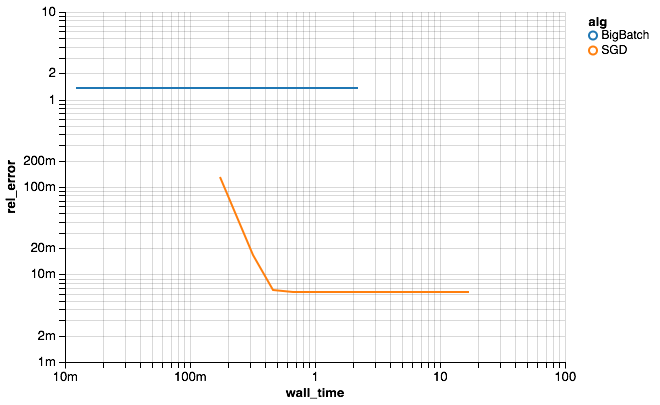

In [333]:
from altair import Chart, X, Y, Axis, Scale
Chart(df).mark_line().encode(
    x=X('wall_time', scale=Scale(type='log')),
    y=Y('rel_error', scale=Scale(type='log')), color='alg')

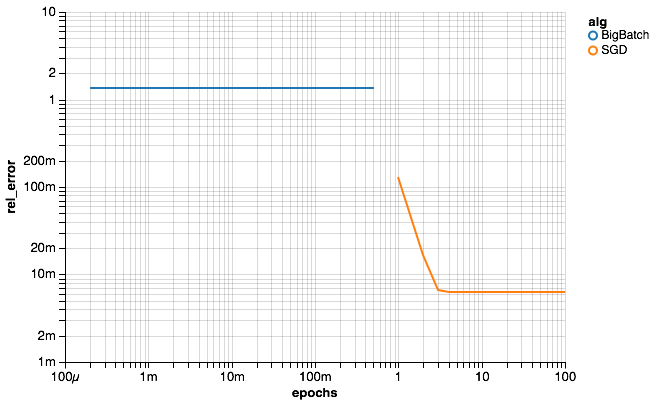

In [334]:
from altair import Chart, X, Y, Axis, Scale
Chart(df).mark_line().encode(
    x=X('epochs', scale=Scale(type='log')),
    y=Y('rel_error', scale=Scale(type='log')), color='alg')